# Logistic Regression 

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# We are working With titanic dataset 
# lets convert our csv file to dataframe

In [4]:
train = pd.read_csv('titanic_train.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

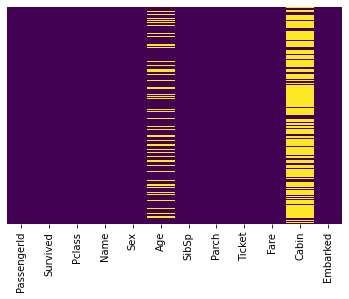

In [6]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
# As we can see that most of the cabin values are none means missing 
# around 20% age values are missing we can fill this values.

In [8]:
# Now lets visualise some data 

In [9]:
'''see the data column of survived and analyse who survived and who not 
survived.
the best way to handle classification problems first understand the ratio 
of the respective columns
For this use count plots'''

'see the data column of survived and analyse who survived and who not \nsurvived.\nthe best way to handle classification problems first understand the ratio \nof the respective columns\nFor this use count plots'

In [10]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

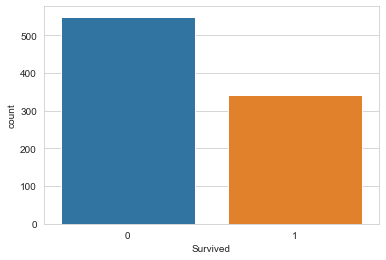

In [11]:
sns.countplot(x='Survived',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

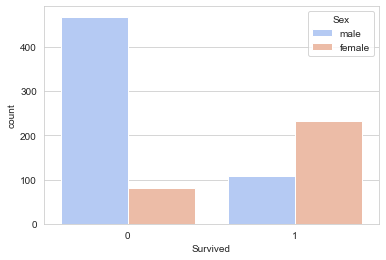

In [12]:
# Now differentiate the data acccording to sex
sns.countplot(x='Survived',data=train,hue='Sex',palette='coolwarm')

In [13]:
# analyse by class

<AxesSubplot:xlabel='Survived', ylabel='count'>

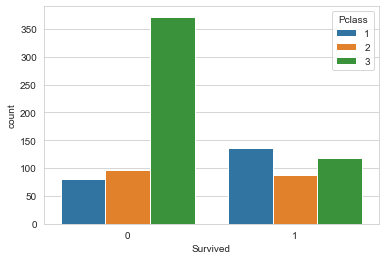

In [14]:
sns.countplot(x='Survived',data=train,hue='Pclass')

In [15]:
# Now, see how age column is distributed

C:\Users\reliance\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


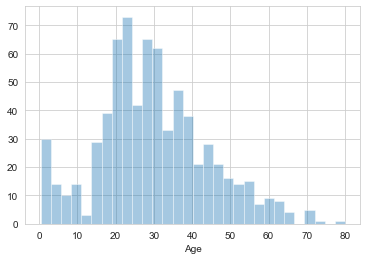

In [16]:
sns.distplot(train['Age'],kde=False,bins=30);

<AxesSubplot:ylabel='Frequency'>

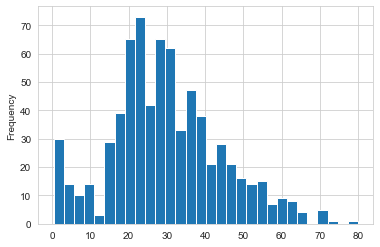

In [17]:
train['Age'].plot.hist(bins=30)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

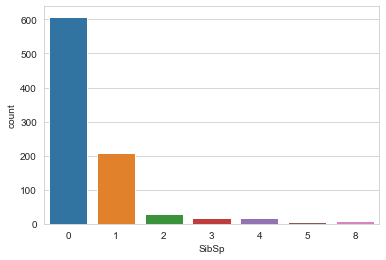

In [19]:
sns.countplot(x='SibSp',data=train)

<AxesSubplot:ylabel='Frequency'>

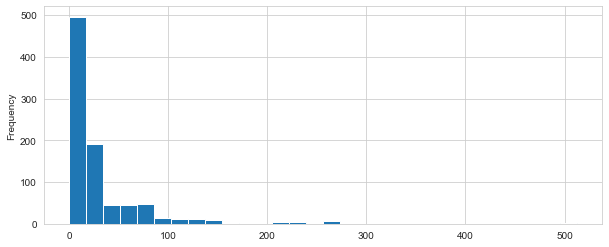

In [20]:
train['Fare'].plot.hist(bins=30,figsize=(10,4))

In [21]:
# Lets do this with cufflinks 

In [22]:
import cufflinks as cf

In [23]:
cf.go_offline()

In [24]:
train['Age'].iplot(kind='hist',bins=30,colors='red')

# Cleaning Of The Data

In [25]:
# You see that there are missing data points in age columns as well as in cabin

In [26]:
'''Filling the data with values is konwn as emputation'''

'Filling the data with values is konwn as emputation'

In [27]:
"""Now we have to fill the data with the avg of age according to class of 
the persons in the titanic"""

'Now we have to fill the data with the avg of age according to class of \nthe persons in the titanic'

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

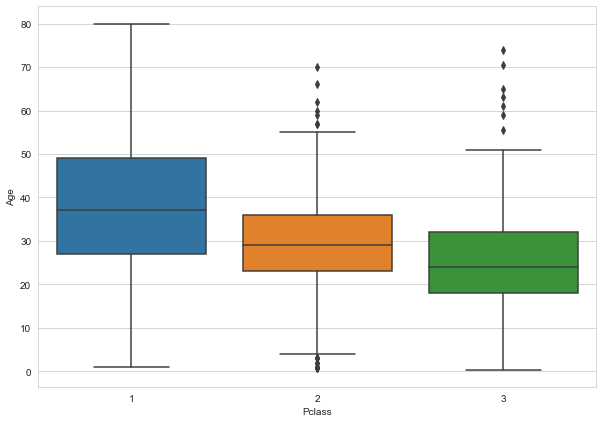

In [28]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [29]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass== 2:
            return 29
        else:
            return 24
    else:
        return Age
        

In [30]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

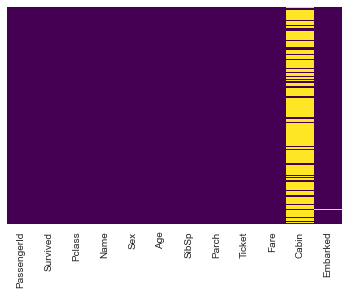

In [31]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [32]:
''' see cabin datapoints,there are so many missing values in this dataset
we can simply drop the column aslo we can classify the column as is cabbin or 
not by filling the values as 1 or 0'''

' see cabin datapoints,there are so many missing values in this dataset\nwe can simply drop the column aslo we can classify the column as is cabbin or \nnot by filling the values as 1 or 0'

In [33]:
train.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:>

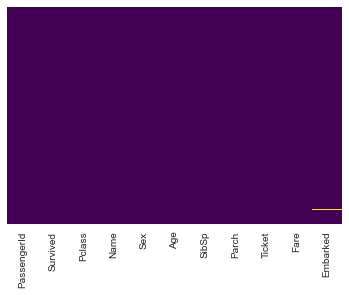

In [34]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [35]:
'''Now there is 1 row affect of missing data points'''

'Now there is 1 row affect of missing data points'

In [36]:
train.dropna(inplace=True)

<AxesSubplot:>

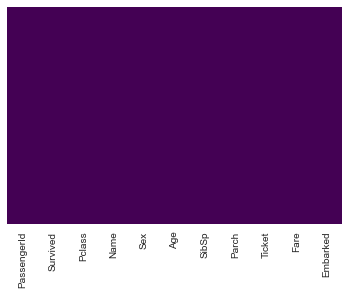

In [37]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [38]:
'''Now the next step is to create dummy variables for categorical values 
such as for sex column dummy variables may be male=1 and female=0 like that
using pandas otherwise our machine learning algorithm won't be able to 
directly take the values as input '''

"Now the next step is to create dummy variables for categorical values \nsuch as for sex column dummy variables may be male=1 and female=0 like that\nusing pandas otherwise our machine learning algorithm won't be able to \ndirectly take the values as input "

In [39]:
pd.get_dummies(train['Sex'],drop_first=True)

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [40]:
'''
---> 
there's one slight issue with this - one column is the perfect predictor 
of the another column means if we give these values to our machine learnig 
algorithm  if one says 0 for female machine learning model definately
going to say that the value is male this issue is known as 'multicolinearity'
Thats why we don't need one column we drop it 
--->
Similarly a bunch of columns would be the perfect predictor of another
columns'''

"\n---> \nthere's one slight issue with this - one column is the perfect predictor \nof the another column means if we give these values to our machine learnig \nalgorithm  if one says 0 for female machine learning model definately\ngoing to say that the value is male this issue is known as 'multicolinearity'\nThats why we don't need one column we drop it \n--->\nSimilarly a bunch of columns would be the perfect predictor of another\ncolumns"

In [41]:
# droping one column

In [42]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [43]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [44]:
embark =pd.get_dummies(train['Embarked'],drop_first=True)

In [45]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [46]:
# Note : Dummy variables are also known as indicators of the categorical values

In [47]:
train = pd.concat([train,sex,embark],axis=1)

In [48]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [49]:
''' See there we don't need sex,embark columns as we already have encoded them
also there is no need of text columns like name and ticket we simply drop them
'''

" See there we don't need sex,embark columns as we already have encoded them\nalso there is no need of text columns like name and ticket we simply drop them\n"

In [50]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace = True)

In [51]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [52]:
# see ID column is just a serial wise arrangement as we have index simply 
# will drop Id column also

In [53]:
train.drop('PassengerId',axis=1,inplace=True)

In [54]:
train.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0


In [1]:
'''Now everything is converted into numerical values which is good for our 
algorithm 
Survived is our label column which we are going to predict using features
given '''

'Now everything is converted into numerical values which is good for our \nalgorithm \nSurvived is our label column which we are going to predict using features\ngiven '

In [56]:
# Now make model to predict whether passenger alives or died

In [57]:
X = train.drop('Survived',axis = 1)
y = train['Survived']

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
logmodel = LogisticRegression()

In [62]:
logmodel.fit(X_train,y_train)

C:\Users\reliance\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [63]:
predictions = logmodel.predict(X_test)

In [64]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [65]:
y_test

511    0
613    0
615    1
337    1
718    0
      ..
792    0
828    1
732    0
669    1
634    0
Name: Survived, Length: 267, dtype: int64

In [67]:
# Now we have to test acurecy of our model
# evaluate our model

In [68]:
from sklearn.metrics import classification_report

In [69]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
confusion_matrix(y_test,predictions)

array([[147,  16],
       [ 30,  74]], dtype=int64)